<a href="https://colab.research.google.com/github/ayman86/playground/blob/patch-1/cov_mobilnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!wget https://figshare.com/ndownloader/files/3381290
#!unzip 3381290


In [24]:
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense
from keras.applications.mobilenet_v2 import MobileNetV2
from keras.applications.mobilenet_v2 import preprocess_input
from keras.utils.traceback_utils import include_frame


In [25]:
num_classes=3
image_size=227


In [26]:
data_genarater=ImageDataGenerator(preprocessing_function=preprocess_input)

In [27]:
train  = '/content/drive/MyDrive/ddvdata/train'
test  = '/content/drive/MyDrive/ddvdata/test'
#Therd step resize
trdata = ImageDataGenerator(rescale= 1./255,
                            shear_range=0.2,
                            zoom_range=0.2,
                            horizontal_flip= True,
)
traindata = trdata.flow_from_directory(directory=train,target_size=(image_size,image_size))

tsdata = ImageDataGenerator(rescale= 1./255,
                            shear_range=0.2,
                            zoom_range=0.2,
                            horizontal_flip= True,
)
testdata = tsdata.flow_from_directory(directory=test,target_size=(227,227))

input_shape = (227,227,3)

Found 10759 images belonging to 3 classes.
Found 2688 images belonging to 3 classes.


In [28]:
model=Sequential()
model.add(MobileNetV2(include_top=False,pooling='avg',weights='imagenet'))


9420800/9406464 [==============================] - 0s 0us/step


In [29]:
model.add(Dense(num_classes,activation='softmax'))

In [30]:
model.layers[0].layers

In [31]:
model.layers[0].trainable=False
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
step_per_epoch_train=len(traindata)
step_per_epoch_vaild=len(testdata)
num_epoch=10


In [32]:
pach_size_train=64
pach_size_valid=64

hist = model.fit_generator(traindata,
                           steps_per_epoch = pach_size_train,
                           epochs = num_epoch,
                           validation_data = testdata,
                           validation_steps =pach_size_valid
                           )

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/10
64/64 [==============================] - 81s 1s/step - loss: 0.5109 - accuracy: 0.7949 - val_loss: 0.3215 - val_accuracy: 0.8760
Epoch 2/10
64/64 [==============================] - 75s 1s/step - loss: 0.2982 - accuracy: 0.8706 - val_loss: 0.2675 - val_accuracy: 0.8970
Epoch 3/10
64/64 [==============================] - 66s 1s/step - loss: 0.2495 - accuracy: 0.8979 - val_loss: 0.2426 - val_accuracy: 0.9053
Epoch 4/10
64/64 [==============================] - 63s 983ms/step - loss: 0.2384 - accuracy: 0.9062 - val_loss: 0.2215 - val_accuracy: 0.9150
Epoch 5/10
64/64 [==============================] - 62s 982ms/step - loss: 0.1978 - accuracy: 0.9224 - val_loss: 0.2443 - val_accuracy: 0.9014
Epoch 6/10
64/64 [==============================] - 61s 956ms/step - loss: 0.2130 - accuracy: 0.9219 - val_loss: 0.2097 - val_accuracy: 0.9185
Epoch 7/10
64/64 [==============================] - 58s 916ms/step - loss: 0.1781 - accuracy: 0.9297 - val_loss: 0.1896 - val_accuracy: 0.9307
Epoch 8/

In [12]:
#model.save('/content/drive/MyDrive/ddvdata/model_saved.h5')


In [13]:
#model.save_spec('/content/drive/MyDrive/ddvdata/model_saved_1.h5')

([TensorSpec(shape=(None, None, None, 3), dtype=tf.float32, name='vgg16_input')],
 {})

In [14]:
#model.save_weights('/content/drive/MyDrive/ddvdata/model_saved_2.h5')

In [47]:
from keras.models import load_model
model = load_model('/content/drive/MyDrive/ddvdata/model_saved.h5')

In [48]:
traindata = trdata.flow_from_directory(directory=train,target_size=(image_size,image_size),shuffle=False)


Found 10759 images belonging to 3 classes.


In [49]:
test_score=model.evaluate(testdata)


84/84 [==============================] - 38s 450ms/step - loss: 0.4801 - accuracy: 0.8438


In [50]:
import matplotlib.pyplot as plt


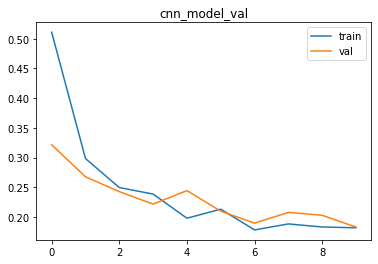

In [51]:
#plot
plt.plot(hist.history['loss'], label = 'train')
plt.plot(hist.history['val_loss'], label = 'val')
plt.title('cnn_model_val')
plt.legend()
plt.show()

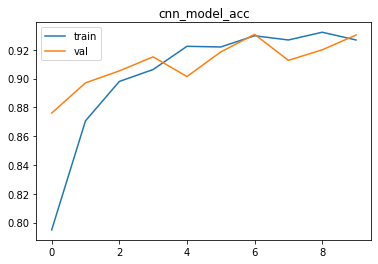

In [52]:
plt.plot(hist.history['accuracy'], label = 'train')
plt.plot(hist.history['val_accuracy'], label = 'val')
plt.title('cnn_model_acc')
plt.legend()
plt.show()

In [53]:
#confusion matrix
import numpy as np
target = ['cov19','normal','pen']
label = [0,1,2]

Y_pred = model.predict_generator(testdata)
y_pred = np.argmax(Y_pred,axis=1)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  


In [54]:
from sklearn.metrics import classification_report,confusion_matrix,plot_confusion_matrix,ConfusionMatrixDisplay

confusmatris
[[316 291 289]
 [280 319 297]
 [269 298 329]]
classification_report
              precision    recall  f1-score   support

       cov19       0.37      0.35      0.36       896
      normal       0.35      0.36      0.35       896
         pen       0.36      0.37      0.36       896

    accuracy                           0.36      2688
   macro avg       0.36      0.36      0.36      2688
weighted avg       0.36      0.36      0.36      2688



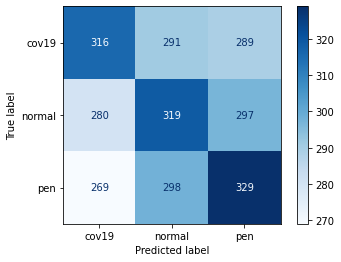

In [57]:
cm = confusion_matrix(testdata.classes,y_pred,labels=label)

print ('confusmatris')
print (confusion_matrix(testdata.classes,y_pred))

print ('classification_report')
print (classification_report(testdata.classes,y_pred, target_names = target))

disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=target)
#disp = disp.plot(cmap = plt.cm.Blues,values_format='g')
disp = disp.plot(cmap = plt.cm.Blues,values_format='g')

plt.show()

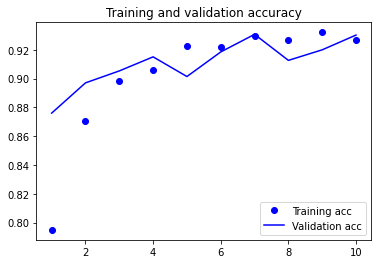

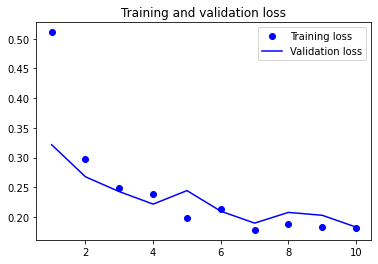

In [41]:
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
loss = hist.history['loss']
val_loss = hist.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()